In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [8]:
start = 2
stop = 5
step = 0.0001
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
#y = x
y = x**2 #zdefiniowanie funkcji y
# x^2/2 | 5, 2 = 25/2 - 4 / 2 = 21 / 2 = 10.5


result_simple = np.sum(y) * step #obliczenie całki oznaczonej funkcji y funckja np.sum
print("Result simple: ", result_simple)

result_quad = integrate.quad(lambda x: x**2, start, stop) #obliczenie całki oznaczonej funkcji y kwadrtura gaussa
print("Result quad: ", result_quad)

#4.3298697960381115e-13 to prognozowany bład liczenia całki
#wraz z malejacym krokiem rosnie bład
#calkowanie numeryczne to jakis typ sumowania, okreslami w jakich punkatch i jakich odstepach sumujemy

Result simple:  39.000150005000165
Result quad:  (39.00000000000001, 4.3298697960381115e-13)


In [6]:
117/3

39.0

In [10]:
start = 2
stop = 5
# start = -np.pi
# stop = np.pi
#start = 0.0001
#stop = 3
step = 0.001
samples = int((stop - start) / step) 

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = x**2 + 3*x + 5 #zdefiniowanie funkcji y (wielomian)
# y = np.sin(x)
#y = x 
# x^3 / 3 + 3/2*x^2 + 5*x | 5, 2 = 125/3 + 75/2 + 25 - 8/3 - 12/2 - 10

print(x)

b_t = time.time()
result_trapezoidal_1 = integrate.trapz(y, x)
e_t = time.time()
print("Result trapezoidal_1: ", result_trapezoidal_1)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time() 
result_trapezoidal_2 = integrate.trapz(y, dx=step) #dx oznacza rozstaw (krok) zmiennych x, opcjonalne
e_t = time.time()
print("Result trapezoidal_2: ", result_trapezoidal_2)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time()
result_simpson_1 = integrate.simps(y, x)
e_t = time.time()
print("Result simpson_1: ", result_simpson_1)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time()
result_simpson_2 = integrate.simps(y, dx=step)
e_t = time.time()
print("Result simpson_2: ", result_simpson_2)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time()
result_trapezoidal_own = np.sum(y)*step - (y[0] + y[-1])/2*step
e_t = time.time()
print("Result trapezoidal_own: ", result_trapezoidal_own)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time()
result_simpson_own = step / 3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
e_t = time.time()
print("Result simpson_own: ", result_simpson_own)
print("Elapsed time: ", e_t - b_t, "\n")

b_t = time.time()
result_simpson_38_own = 3*step / 8 * (y[0] + y[-1] + 3*np.sum(y[1:-1:3]) + 3*np.sum(y[2:-1:3]) +2*np.sum(y[3:-1:3]))
e_t = time.time()
print("Result simpson_38_own: ", result_simpson_38_own)
print("Elapsed time: ", e_t - b_t, "\n")

#Nie ma to dużego znaczenia w przypadkach praktycznych, 
#generowanie zakresu ma swoje wady, przy mniejszym kroku nie sa tak dokladne

[2.         2.00100033 2.00200067 ... 4.99799933 4.99899967 5.        ]
Result trapezoidal_1:  85.5000005003335
Elapsed time:  0.0 

Result trapezoidal_2:  85.47150050016673
Elapsed time:  0.0 

Result simpson_1:  85.50000000016684
Elapsed time:  0.0003447532653808594 

Result simpson_2:  85.47150000016676
Elapsed time:  0.0006575584411621094 

Result trapezoidal_own:  85.47150050016673
Elapsed time:  0.0 

Result simpson_own:  85.45650216738912
Elapsed time:  0.0 

Result simpson_38_own:  85.46587662550016
Elapsed time:  0.0 



In [10]:
125/3 + 75/2 + 25 - 8/3 - 12/2 - 10

85.49999999999999

In [5]:
#ZADANIE 1
#Zaimplementuj funkcję (za pomocą pętli for, bez użycia gotowych funkcji) implementującą metodę trapezów, 
#metodę Simpsona 1/3 imetodę Simpsona 3/8. Porównaj działanie do funkcji dostępnych w bibliotece scipy 
#(zarówno pod kątem czasu obliczeń jak i uzyskanych wyników). Porównaj dokładność wyznaczonych sum z wartością 
#oczekiwaną dla wybranych, znanych całek oznaczonych.

start = 5
stop = 15
step = 0.0001
samples = int((stop - start) / step) 

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
#y = x
# x^2/2 | 5, 2 = 25/2 - 4 / 2 = 21 / 2 = 10.5
y = 2*x + 10 #zdefiniwanie funkcji y

integ_y = 300 #całka oznaczona funkcji y idealna

def our_integrate(y, method): #zdefiniowanie funkjci do liczenia całki oznaczonej
    
    # method = trapezoidal, simpson_13, simpson_38
    
    integ = 0 #wartość początkowa całki oznaczonej
    if method=="trapezoidal": #metoda trapezów
        
        for i in range(len(y)-1): #pętla do liczenia całki oznaczonej
            integ += (y[i]+y[i+1]) * step * 0.5 #algorytm sumy 
            
    if method=="simpson_13": #metoda simspona 1/3
        
        for i in range(0, len(y)-2, 2): #Pętla do liczenia całki oznaczonej z krokiem 2
            integ += (y[i]+4*y[i+1]+y[i+2]) * step / 3 #algorytm sumy
        
    if method=="simpson_38": #meotda simpsona 3/8
        
        for i in range(0, len(y)-3, 3): #Pętla do liczenia całki oznaczonej z krokiem 3
            integ += (y[i]+3*y[i+1]+3*y[i+2]+y[i+3]) * 3 * step / 8 #algorytm sumy
       
    return integ #zwrócenie całki oznaczonej 

def mse(x1, x2): #funkcja do obliczania błedu średnio-kwadratowego
    return np.mean(np.sqrt((x1 - x2)**2)) #zwrócenie wartości błędu

print("MSE trapezoidal:", mse(integ_y, our_integrate(y, "trapezoidal")), "\n" ) #błąd naszej funkcji metoda trapezów
print("MSE simpson13:", mse(integ_y, our_integrate(y, "simpson_13")), "\n" ) #błąd naszej funkcji metoda simposna 1/3
print("MSE simpson38:", mse(integ_y, our_integrate(y, "simpson_38")), "\n" ) #bład naszej funkcji metoda simpsona 3/8
 
b_t = time.time()
result_trapz_our = our_integrate(y, "trapezoidal")
e_t = time.time()
print("\nResult our trapezidal:", result_trapz_our)
print("Elapsed time: ", e_t - b_t, "\n" )

b_t = time.time()
result_trapz = integrate.trapz(y, x)
e_t = time.time()
print("Result scipy trapezidal:", result_trapz)
print("Elapsed time: ", e_t - b_t, "\n" )

b_t = time.time()
result_simp13_our = our_integrate(y, "simpson_13")
e_t = time.time()
print("Result our simpson 1/3:", result_simp13_our)
print("Elapsed time: ", e_t - b_t,"\n" )
      
b_t = time.time()
result_simp13 = integrate.simps(y, dx=step)
e_t = time.time()
print("Result scipy simpson 1/3:", result_simp13)
print("Elapsed time: ", e_t - b_t,"\n" )

b_t = time.time()
result_simp38_our = our_integrate(y, "simpson_38")
e_t = time.time()
print("Result our simpson 3/8:", result_simp38_our)
print("Elapsed time: ", e_t - b_t, "\n" )
      
b_t = time.time()
result_simp38 = integrate.simps(y, dx=step)
e_t = time.time()
print("Result scipy simpson 3/8:", result_simp38)
print("Elapsed time: ", e_t - b_t, "\n" )

#Nasza funkcja dla metody simpsona jest wolniejsza, dla simpson 3/8 pojawia sie najwiekszy blad

MSE trapezoidal: 0.002999999999872216 

MSE simpson13: 0.006999989999940226 

MSE simpson38: 0.0030000000000427463 


Result our trapezidal: 299.9970000000001
Elapsed time:  0.057059288024902344 

Result scipy trapezidal: 300.0
Elapsed time:  0.0009949207305908203 

Result our simpson 1/3: 299.99300001000006
Elapsed time:  0.05504965782165527 

Result scipy simpson 1/3: 299.997
Elapsed time:  0.0010023117065429688 

Result our simpson 3/8: 299.99699999999996
Elapsed time:  0.056049346923828125 

Result scipy simpson 3/8: 299.997
Elapsed time:  0.0010020732879638672 



In [51]:
start = 0.0001
stop = 3

b_t = time.time()
# result_quad = integrate.quad(lambda x: x**2 + 3*x + 5, start, stop)
result_quad = integrate.quad(lambda x: 1/x, start, stop)  #obliczenie całki oznaczonej funkcji kwadrtura gaussa
e_t = time.time()
print("Time: ", e_t - b_t)
print("Result quad: ", result_quad)

#Takie rozwiązanie mocno zalezne od wielomianu, musimy znac wzor funkcji,

Time:  0.0
Result quad:  (10.308952660644293, 1.0784698451020285e-09)


In [53]:
start = 1
stop = 4
step = 0.0001
samples = int((stop - start) / step) #wygenerowanie liczby próbek
noise_level = 0.001

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = 2*x**3 + 3*x**2 + 5*x - 7 #zdefiniowanie funkcji y
y_noise = y + np.random.randn(y.shape[0])*noise_level #funkcja y z szumem

result_trapezoidal = integrate.trapz(y, x) #calkowanie metoda trapezow funkcji y
print("Result trapeozidal: ", result_trapezoidal)

result_trapezoidal_noise = integrate.trapz(y_noise, x) #calkowanie metoda trapezow funkcji y z szumem
print("Result trapeozidal with noise: ", result_trapezoidal_noise)

#Szum wpływa na wynik calkowania, ale znacznie mniej niz w przypadku pochodnych,  zwiekszanie kroku nie wplywa na 
#zwiększanie błędu
#sygnal zaszumiony szumem normalnym przy liczeniu calki nie jest to bardzo istotne

Result trapeozidal:  207.000000090006
Result trapeozidal with noise:  207.00000004456007


Text(0, 0.5, 'Y')

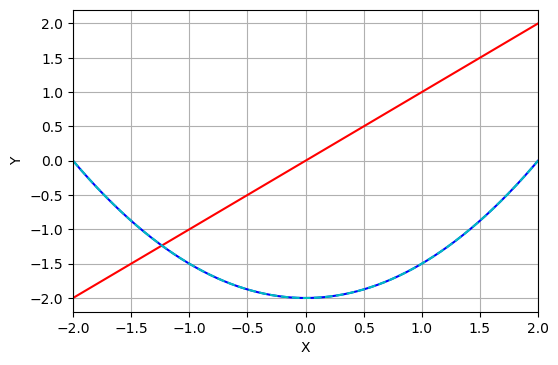

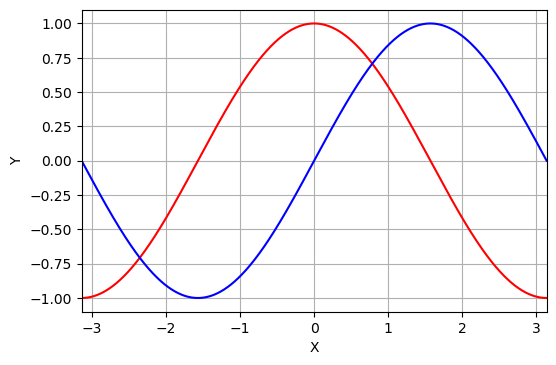

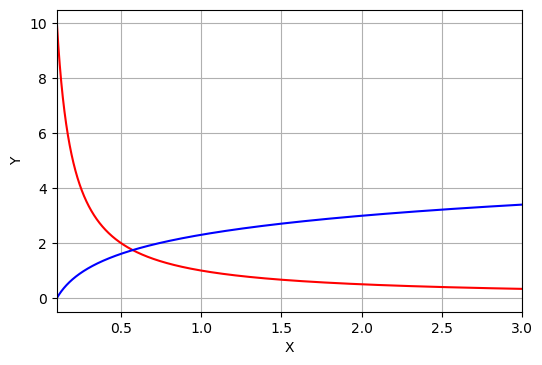

In [157]:
start = -2
stop = 2
step = 0.0001
samples = int((stop - start) / step) #wygenerowanie liczby próbek

x = np.linspace(start, stop, samples) #wygenrowanie zakresu zmiennej x
y = x #zdefiniowanie funkcji y
 
integ_y = (x**2) * 0.5 - 2 #zdefiniowanie calki funkcji y

y_integral = np.cumsum(y)*step #obliczenie calki oznaczonej funkji y

#print(integrate.trapz(y, x))


plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, y, "r-") #wykres funkcji y, bez stalej C
plt.plot(x, y_integral, "b-") #wykres calki funkcji y
plt.plot(x, integ_y, "c--") #wykres idealnej calki funkcji y
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału
plt.xlabel("X")
plt.ylabel("Y")

#funkcja jest prawidłowa, brakje tutaj elementu stałego (w calkowaniu to jest C)

start = -np.pi
stop = np.pi
step = 0.0001
samples = int((stop - start) / step) #wygenerowanie liczby próbek

x = np.linspace(start, stop, samples) #wygenrowanie zakresu zmiennej x
y = np.cos(x) #zdefiniowanie funkcji y

y_integral = np.cumsum(y)*step #obliczenie calki oznaczonej funkji y

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, y, "r-") #wykres funkcji y, bez stalej C
plt.plot(x, y_integral, "b-") #wykres calki funkcji y
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału
plt.xlabel("X")
plt.ylabel("Y")

start = 0.1
stop = 3
step = 0.0001
samples = int((stop - start) / step) #wygenerowanie liczby próbek

x = np.linspace(start, stop, samples) #wygenrowanie zakresu zmiennej x
y = 1/x #zdefiniowanie funkcji y

y_integral = np.cumsum(y)*step #obliczenie calki oznaczonej funkji y


plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, y, "r-") #wykres funkcji y, bez stalej C
plt.plot(x, y_integral, "b-") #wykres calki funkcji y
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału
plt.xlabel("X")
plt.ylabel("Y")

#Ostatni element tablicy otrzymanej z funkcji np.cumsum to nasza całka oznaczona

Wynik całki oznaczonej funkcji y1 (np.cumsum): 1.9999900000000002
Wynik całki oznaczonej funkcji y1 (nasza): 1.9999900000000002


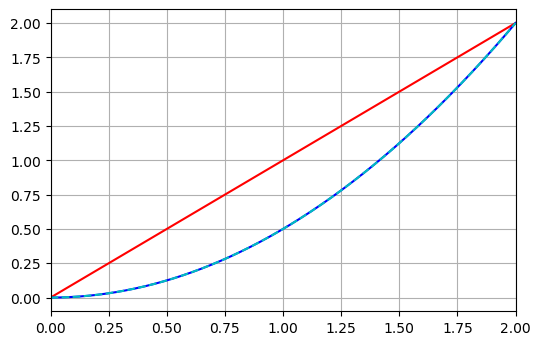

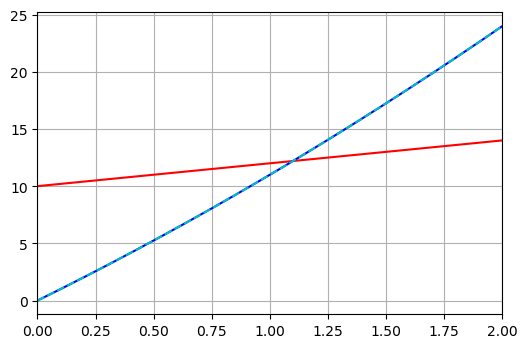

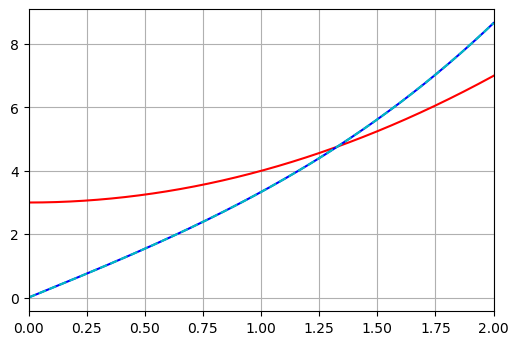

Elapsed time our simpson13:  0.1931748390197754 

Elapsed time our simpson38:  0.18516802787780762 

Elapsed time our trapezoidal:  0.20118308067321777 

Elapsed time gauss quad:  0.002001523971557617 



In [6]:
#ZADANIE 2
#Zaimplementuj własny generator do sumy kumulacyjnej (zapomocą pętli for) i korzystając z niej zaimplementuj 
#rekurencyjnie całkowanie z Zadania 1. Dokonaj wizualizacji przykładowych funkcji i ich całek (jak na zajęciach). 
#Jakie zalety ma implementacja rekurencyjna całkowania? Jakie wady? Porównaj szybkość działania implementacji 
#rekurencyjnej całkowania metodą trapezów/Simpsona z wbudowaną funkcją do całkowania kwadraturą Gaussa z biblioteki scipy.


start = 0
stop = 2
step = 0.00001
samples = int((stop - start) / step) #wygenerowanie liczby probek

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y1 = x #definicja funkcji y
y2 = 2*x + 10
y3 = x**2 + 3
# x^2/2 | 5, 2 = 25/2 - 4 / 2 = 21 / 2 = 10.5

def cumsum_generator(y): #generator sumy skumulowanej
    cumsum = np.zeros(len(y)) #tablica zer wielkości tablicy wejsciowej
    cumsum[0] = y[0] #przypisanie 1 wartosci 
    for i in range(len(y)-1): #pętla to obliczenia pozostałych wartosci
        cumsum[i+1] = cumsum[i] + y[i+1] #dodawanie kolejnych elementow do tablicy
    return cumsum #zwrocenie tablicy sumy skumulowanej

def our_integrate_recur(y, method): #funkcja do obliczenia funkcji całki
    
    # method = trapezoidal, simpson_13, simpson_38
    
    integ = 0 #wartosc poczatkowa całki
    cumsum = np.zeros(len(y)) #tablica do wypelnienia wartosciami calki
    
    if method=="trapezoidal": #metoda trapezów
        
        for i in range(len(y)-1): #petla do wypelnienia tablicy wartosci calki
            integ += (y[i]+y[i+1]) * step * 0.5 #obliczanie kolejnych wartosci calki
            cumsum[i] = integ #przypisanie kolejnym elelemntowm wartosci calki
            
        cumsum[-1] = cumsum_generator(y)[-1]*step #- (y[-2]+y[-1]) * step * 0.5 #przypisanie wartosci ostatniego elementu
            
    if method=="simpson_13": #metoda simpsona 1/3
        
        for i in range(0, len(y)-2, 2): #Pętla do wypelnienia tablicy z krokiem 2
            integ += (y[i]+4*y[i+1]+y[i+2]) * step / 3 #obliczanie kolejnych wartosci calki
            cumsum[i] = integ #przypisanie kolejnym elelemntowm wartosci calki

        cumsum[-1] = cumsum_generator(y)[-1]*step #- (y[-3]+4*y[-2]+y[-1]) * step / 3 #przypisanie wartosci ostatniego elementu
        
    if method=="simpson_38":
        
        for i in range(0, len(y)-3, 3): #Pętla do wypelnienia tablicy z krokiem 3
            integ += (y[i]+3*y[i+1]+3*y[i+2]+y[i+3]) * 3 * step / 8 #obliczanie kolejnych wartosci calki
            cumsum[i] = integ #przypisanie kolejnym elelemntowm wartosci calki
        #cumsum[0] = y[0]
        cumsum[-1] = cumsum_generator(y)[-1]*step #- (y[-4]+3*y[-3]+3*y[-2]+y[-1]) * 3 * step / 8 #przypisanie wartosci ostatniego elementu
    
    return cumsum #zwrocenie tablicy z wartosciami calki


result_y1 = np.cumsum(y1)*step #obliczenie calki oznaczonej funkcji y1
print("Wynik całki oznaczonej funkcji y1 (np.cumsum):" ,result_y1[-1])

result_y1_func = cumsum_generator(y1)*step #obliczenie nasza funkcja calki oznaczonej y1
print("Wynik całki oznaczonej funkcji y1 (nasza):" ,result_y1_func[-1])

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x,y1, "r-") #wykres funkcji y1
plt.plot(x, np.cumsum(y1)*step, "b-") #wykres calki funkcji y1
plt.plot(x, our_integrate_recur(y1, "trapezoidal"), "c--") #wykres naszej calki funkcji y1
plt.grid(True)
plt.xlim([start,stop])
plt.show()

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x,y2, "r-") #wykres funkcji y2
plt.plot(x, np.cumsum(y2)*step, "b-")#wykres calki funkcji y2
plt.plot(x, our_integrate_recur(y2, "trapezoidal"), "c--") #wykres naszej calki funkcji y2
plt.grid(True)
plt.xlim([start,stop])
plt.show()

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x,y3, "r-") #wykres funkcji y3
plt.plot(x, np.cumsum(y3)*step, "b-") #wykres calki funkcji y3
plt.plot(x, our_integrate_recur(y3, "trapezoidal"), "c--") #wykres naszej calki funkcji y3
plt.grid(True)
plt.xlim([start,stop])
plt.show()



b_t = time.time()
result_y_func = our_integrate_recur(y1, "simpson_13")
e_t = time.time()
print("Elapsed time our simpson13: ", e_t - b_t, "\n" )

b_t = time.time()
result_y_func = our_integrate_recur(y1, "simpson_38")
e_t = time.time()
print("Elapsed time our simpson38: ", e_t - b_t, "\n" )

b_t = time.time()
result_y_func = our_integrate_recur(y1, "trapezoidal")
e_t = time.time()
print("Elapsed time our trapezoidal: ", e_t - b_t, "\n" )

b_t = time.time()
result_y_func = integrate.quad(lambda x: x, start, stop)
e_t = time.time()
print("Elapsed time gauss quad: ", e_t - b_t, "\n" )

#

Sum:  5.333257065974794
Quad:  (5.333333333333333, 5.921189464667501e-14)


Text(0, 0.5, 'Y')

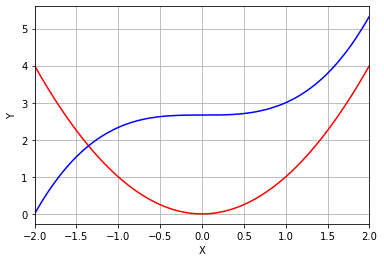

In [64]:
#całkowanie punktów rozłożonych nierównomiernie

start = -2
stop = 2
samples = 100000
x = (np.random.rand(samples) - 0.5)*(start-stop) #wygenerwoanie zakresu zmiennej x, punkty nieuporządkowane
x = np.sort(x) #uporządkowanie wartości x
dx = x[1:] - x[0:-1] #dx to tablica kroków odpowiadajacych poszczegolnym punktom
dx = np.concatenate((dx, np.array([dx[0]]))) #złaczenie tablicy dx ztablica zawierajaca wartosc dx[0]

y = x**2
y_integral = np.cumsum(y*dx)

print("Sum: ", y_integral[-1]) #nasza wartość całki oznaczonej

result_quad = integrate.quad(lambda x: x**2, start, stop) #obliczanie całki oznaczonej metoda kwadrastury gaussa
print("Quad: ", result_quad)
 
plt.figure() #przedastawienie wykresów
plt.plot(x, y, "r-") #wykres funkcji y
plt.plot(x, y_integral, "b-") #wykres calki funkcji y
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie zakresu osi x
plt.xlabel("X")
plt.ylabel("Y")

#im większa liczba próbek, tym wykres calki dokładniejszy

2-D Integral:  42.68800533466697
Time:  0.017014265060424805 

2-D Integral Trapezoidal:  42.64534133333334
Time:  0.12511301040649414 

2-D Integral Trapezoidal:  42.687997334666996
Time:  0.11310386657714844 

2-D Integral Gaussian 2-D:  (42.666666666666664, 4.736951571734001e-13)
Time:  0.0010008811950683594 



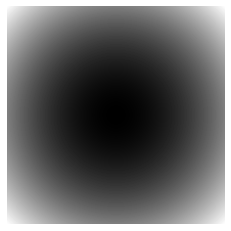

In [7]:
start = -2
stop = 2
step = 0.001
samples = int((stop - start) / step) #wygenerowanie liczby próbek
x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y
 
xs, ys = np.meshgrid(x, y) #wygenerowanie siatek osi x i y
zs = xs**2 + ys**2 #definicja funkcji zs
# 42.6667


plt.figure() #przedstawienie wykresu funkcji zs
plt.imshow(zs, cmap="gray")
plt.axis('off')

b_t = time.time()
total_sum = np.sum(zs)*step**2 #obliczenie sumy wszystkich punktów zbioru
print("2-D Integral: ", total_sum)
e_t = time.time()
print("Time: ", e_t - b_t, "\n")

b_t = time.time()
print("2-D Integral Trapezoidal: ", integrate.trapz(integrate.trapz(zs))*step**2)
e_t = time.time()
print("Time: ", e_t - b_t, "\n")

b_t = time.time()
print("2-D Integral Trapezoidal: ", integrate.trapz(np.ravel(zs))*step**2)
e_t = time.time()
print("Time: ", e_t - b_t, "\n")

#np.ravel() - funkcja do rzutowania funkcji do 1D

b_t = time.time()
print("2-D Integral Gaussian 2-D: ", integrate.dblquad(lambda y, x: y**2 + x**2, -2, 2, -2, 2))
e_t = time.time()
print("Time: ", e_t - b_t, "\n")



In [9]:
#ZADANIE 3
#Zaimplementuj własną funkcję do całkowania funkcji dwóch zmiennych metodą trapezów. Porównaj uzyskane wyniki 
#z metodą opartą o kwadratury Gaussa dla dwóch zmiennych pod względem dokładności i szybkości wykonywania. 
#W jakich przypadkach zaimplementowana metoda może być bardziej użyteczna od metod opartych o kwadratury Gaussa?

start = -2
stop = 2
xstep = 0.01
ystep = 0.01
xsamples = int((stop - start) / xstep) #liczba próbek x
ysamples = int((stop - start) / ystep) #liczba próbek y
x = np.linspace(start, stop, xsamples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, ysamples) #wygenerowanie zakresu zmiennej y

xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x y
zs = xs**2 + ys**2 #definicaj funkcji dwoch zmiennych zs

def our_integrate_2D_sum(z, x_step, y_step): #zdefiniowanie funkcji do liczenia calki z sumy calkowitej 
    
    sum = 0 #wartosc poczatkowa sumy
    for i in range(len(zs)): #pętla do liczenia sumy
        for j in range(len(zs)):
            sum += z[i,j] #algorytm liczenia sumy
            
    integ = sum *( x_step * y_step) #obliczenie wartosci calki
    return integ #zwrocenie calki


def our_integrate_2D_trap(z, x_step, y_step): #funkcja do obliczenia calki metoda trapezow
    
    integ = 0 #wartosc poczatkowa calki
    for i in range(len(zs)-1): #petla do liczenia wartosci calki
        for j in range(len(zs)-1):
            integ += (z[i,j]+z[i+1,j+1]) * x_step * y_step * 0.5 #algorytm liczenia calki 

    return integ #zwrocenie wartosci calki


#print(our_integrate_2D_sum(zs, xstep, ystep))
#print(our_integrate_2D_trap(zs, xstep, ystep))
#print(integrate.dblquad(lambda y, x: y**2 + x**2, -2, 2, -2, 2))


b_t = time.time()
print("2-D Integral our func: ", our_integrate_2D_sum(zs, xstep, ystep))
e_t = time.time()
print("Time: ", e_t - b_t, "\n")


b_t = time.time()
print("2-D Integral Trapezoidal our func: ", our_integrate_2D_trap(zs, xstep, ystep))
e_t = time.time()
print("Time: ", e_t - b_t, "\n")


b_t = time.time()
print("2-D Integral Gaussian 2-D: ", integrate.dblquad(lambda y, x: y**2 + x**2, -2, 2, -2, 2))
e_t = time.time()
print("Time: ", e_t - b_t, "\n")

#Własna funkcja lepsza gdy mamy dwa różne kroki dla zmiennych x, y ???
#W momencie gdy nie znamy wzoru funkcji

2-D Integral our func:  42.88053467000764
Time:  0.035032033920288086 

2-D Integral Trapezoidal our func:  42.45413333333172
Time:  0.12010931968688965 

2-D Integral Gaussian 2-D:  (42.666666666666664, 4.736951571734001e-13)
Time:  0.0010004043579101562 



Min/Max 0.0 0.9395694117647059
Diff:  0.18463666731837355
Min/Max input 0.0 1.0
Min/Max integral 0.0 1.0
Diff:  0.010351368899440019


(-0.5, 198.5, 253.5, -0.5)

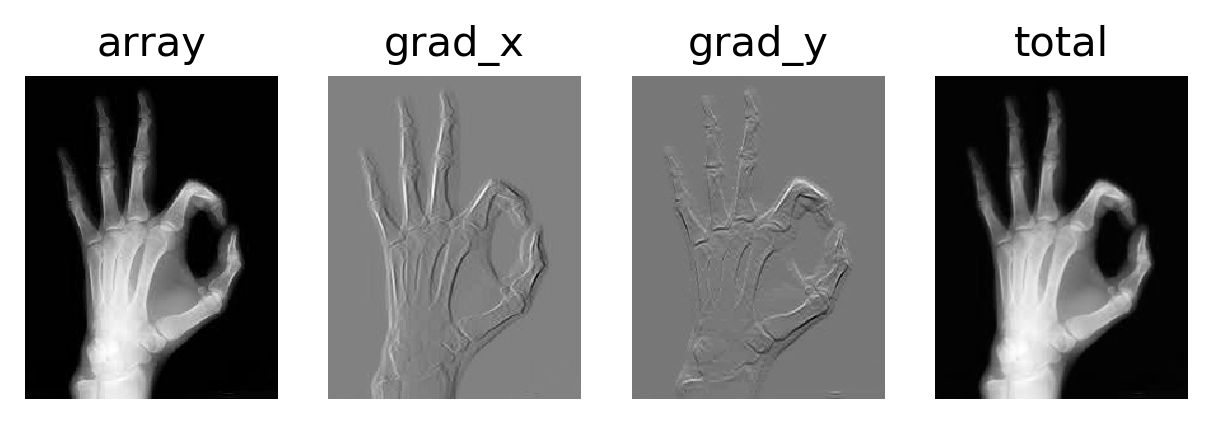

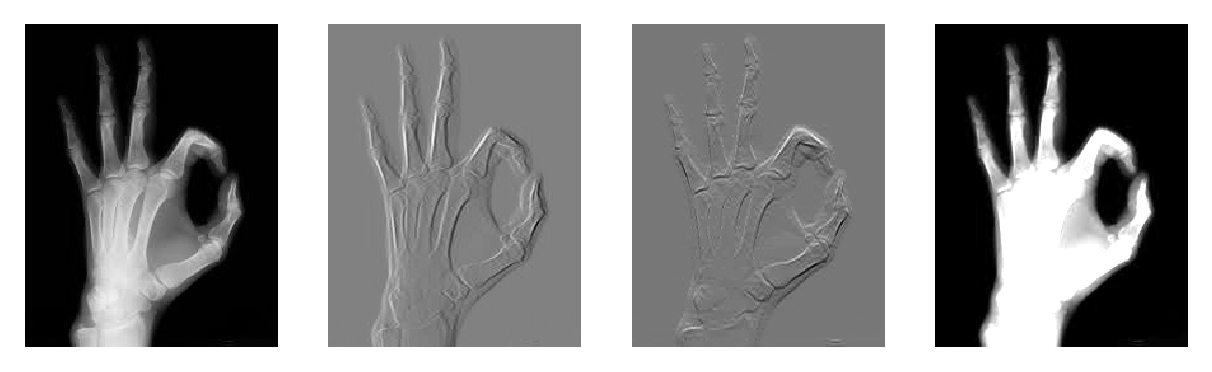

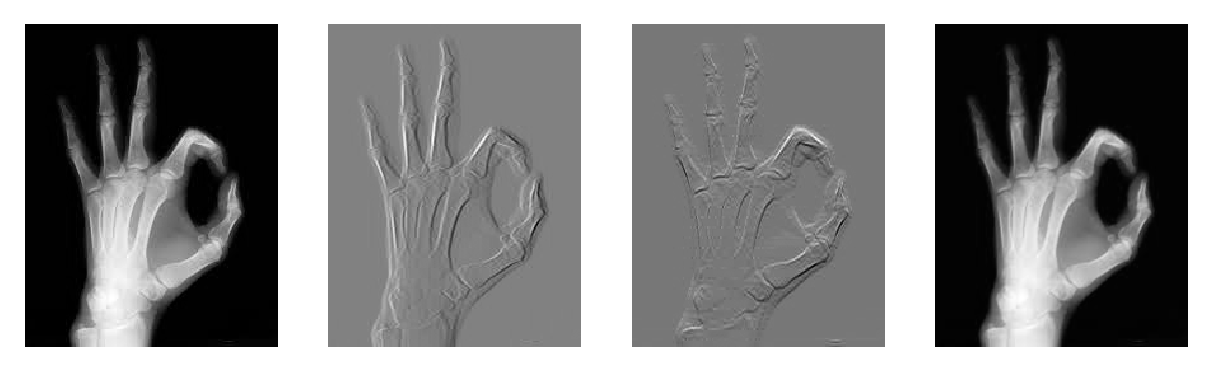

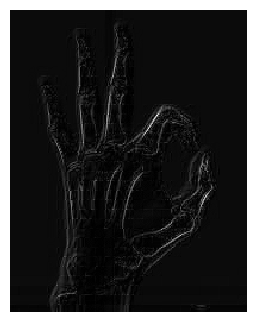

In [11]:
from skimage import io
from skimage import color
array = io.imread("example.jpeg") #wczytanie zdjęcia
array = color.rgb2gray(array) #zmiana koloru zdjecia na skale szarości

grad_y, grad_x = np.gradient(array) #wygenerowanie siatki osi x i y ze zdjecia

rows = 1
cols = 4

sum_xx = np.cumsum(grad_x, axis=1) #obliczenie sumy po osi xx
sum_yy = np.cumsum(grad_y, axis=0) #obliczenie sumy po osi yy
sum_xy = np.cumsum(grad_x, axis=0) #obliczenie sumy po osi xy
sum_yx = np.cumsum(grad_y, axis=1) #obliczenie sumy po osi yx


total = sum_xx + sum_yy #obliczenie sumy całkowitej

#total_simp = np.append(simp_xx, simp_yy)
#total_simp = np.stack((simp_xx , simp_yy))


#print(sum_xx.shape)
#print(sum_yy.shape)
#print(simp_xx.shape)
#print(simp_yy.shape)
#print(total.shape)

plt.figure(dpi=250) #przedstawienie wykresów
plt.subplot(rows, cols, 1)
plt.imshow(array, cmap='gray') #wykres zdjecia
plt.title("array")
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(grad_x, cmap='gray') #wykres gradientu na osi x
plt.title("grad_x")
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(grad_y, cmap='gray') #wykres gradientu na osi x
plt.title("grad_y")
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(total, cmap='gray') #wykres sumy calkowitej (wykres calki)
plt.title("total")
plt.axis('off')


print("Min/Max", np.min(array), np.max(array))
print("Diff: ", np.mean(np.abs(array-total)))

plt.figure(dpi=250)
plt.subplot(rows, cols, 1)
plt.imshow(array, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(total, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image))

plt.figure(dpi=250) ##przedstawnie znormalizowanych obrazów
plt.subplot(rows, cols, 1)
plt.imshow(normalize(array), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(normalize(total), cmap='gray', vmin=0, vmax=1)
plt.axis('off')

print("Min/Max input", np.min(normalize(array)), np.max(normalize(array)))
print("Min/Max integral", np.min(normalize(total)), np.max(normalize(total)))
print("Diff: ", np.mean(np.abs(normalize(array)-normalize(total))))

plt.figure(dpi=100)
plt.imshow(np.abs(normalize(array)-normalize(total)), cmap='gray')
plt.axis('off')


In [ ]:
#ZADANIE 4
#Postaraj się znaleźć źródło różnić w ostatnim przykładziepokazującym proces całkowania obrazu. 
#Wyjaśnij skąd biorą sięróżnicę i spróbuj je zminializować

#Skąd się bierze błąd po znormalizowaniu?
#1. Suma kumulacyjna nie jest idealną całką, można zasąpić metodą simpsona
#2. sum_xy, sum_yx 


